<a href="https://colab.research.google.com/github/Khorrlybobo/US-Baby-names-data-repo/blob/main/US_Baby_Names_Data_Manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from array import array

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
years = range(1880, 2021)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
  path = "/content/drive/MyDrive/US Baby Names/yob%d.txt" %year
  frame = pd.read_csv(path, names = columns)

  frame['year'] = year
  pieces.append(frame)

names = pd.concat(pieces, ignore_index = True)

In [4]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021244 entries, 0 to 2021243
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   births  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 61.7+ MB


In [5]:
total_births = names.pivot_table('births', index = 'year', columns ='sex', aggfunc = sum)

In [6]:
total_births.tail()

sex,F,M
year,,
2016,1769164,1894723
2017,1723043,1847191
2018,1696917,1811738
2019,1673030,1788414
2020,1609171,1718248


<Axes: title={'center': 'Total births by sex and year'}, xlabel='year'>

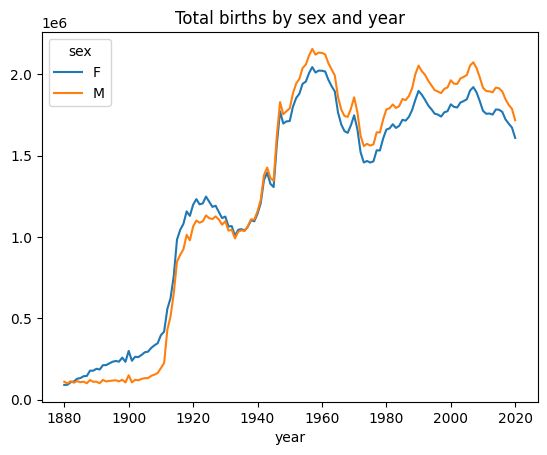

In [7]:
total_births.plot(title='Total births by sex and year')

In [8]:
def add_prop(group):
  #Integer division floors 
  births = group.births.astype(float)

  group['prop'] = births / births.sum()
  return group
names = names.groupby(['year', 'sex']).apply(add_prop)

<ipython-input-8-d2eca1023950>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  names = names.groupby(['year', 'sex']).apply(add_prop)


In [9]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2021239,Zykell,M,5,2020,0.000003
2021240,Zylus,M,5,2020,0.000003
2021241,Zymari,M,5,2020,0.000003
2021242,Zyn,M,5,2020,0.000003


In [10]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [11]:
def get_top1000(group):
  return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [12]:
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077642
         1             Anna   F    2604  1880  0.028617
         2             Emma   F    2003  1880  0.022012
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2020 M   2008234    Jericho   M     213  2020  0.000124
         2008233     Harris   M     213  2020  0.000124
         2008235    Rogelio   M     212  2020  0.000123
         2008236     Jerome   M     211  2020  0.000123
         2008237      Karim   M     211  2020  0.000123

[281876 rows x 5 columns]

In [13]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [14]:
top1000.rename(columns={'year': 'years'},inplace=True)
total_births = top1000.pivot_table('births', index = 'years', columns = 'name', aggfunc=sum)

In [15]:
total_births

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Aarya,Ab,Abagail,...,Zola,Zollie,Zona,Zora,Zoya,Zula,Zuri,Zyair,Zyaire,Zyon
years,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,7.0,NaN,8.0,28.0,NaN,27.0,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,...,10.0,NaN,9.0,21.0,NaN,27.0,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,9.0,NaN,17.0,32.0,NaN,21.0,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,...,10.0,NaN,11.0,35.0,NaN,25.0,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,14.0,6.0,8.0,58.0,NaN,27.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,NaN,284.0,4647.0,NaN,519.0,7167.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,891.0,NaN,248.0,NaN
2017,241.0,291.0,4185.0,NaN,526.0,7211.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,850.0,NaN,301.0,NaN
2018,NaN,NaN,3834.0,NaN,488.0,5982.0,NaN,NaN,NaN,NaN,...,276.0,NaN,NaN,269.0,NaN,NaN,1131.0,NaN,323.0,NaN


In [16]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<Axes: xlabel='years'>, <Axes: xlabel='years'>,
       <Axes: xlabel='years'>, <Axes: xlabel='years'>], dtype=object)

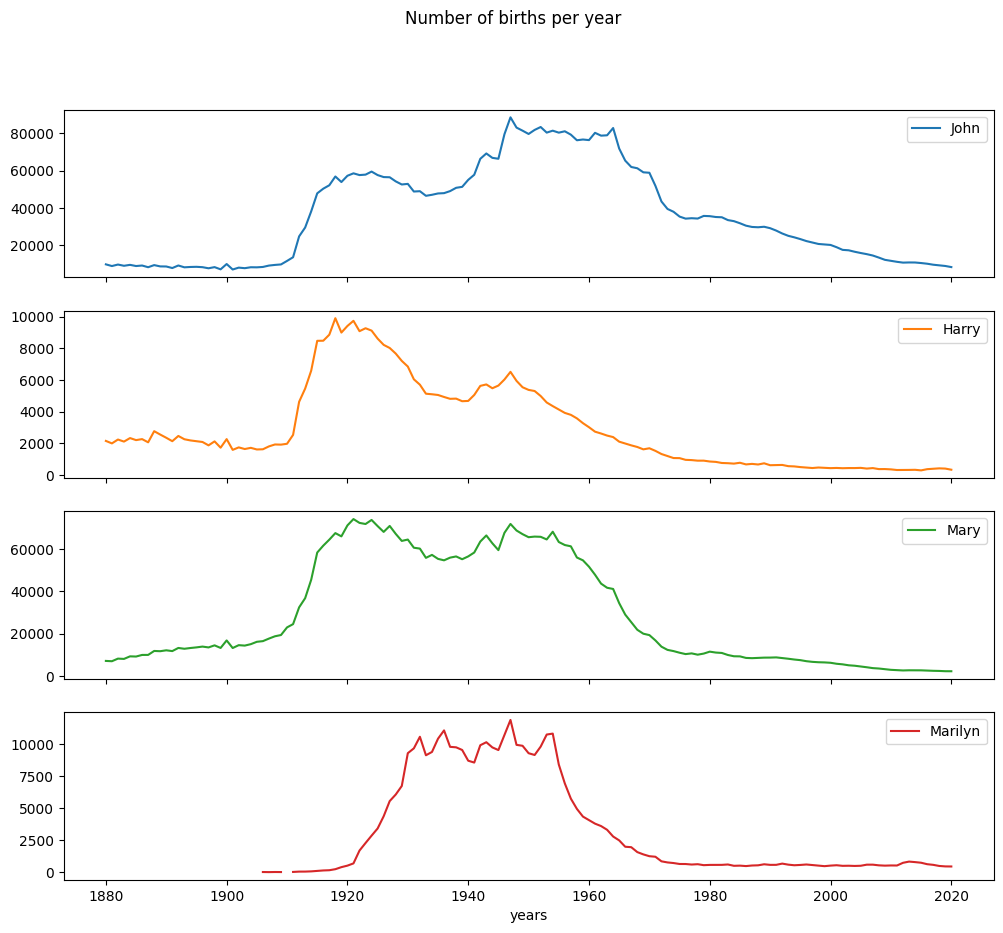

In [17]:
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

<Axes: title={'center': 'Sum of table1000.prop by year and sex'}, xlabel='year'>

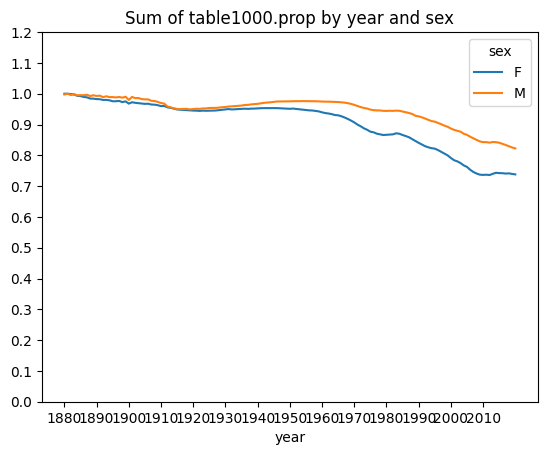

In [18]:
top1000.rename(columns={'sex': 'sexx'},inplace=True)
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [19]:
df = boys[boys.year == 2010]
df

name sex  births  year      prop
year sex                                             
2010 M   1678130    Jacob   M   22139  2010  0.011546
         1678131    Ethan   M   18008  2010  0.009392
         1678132  Michael   M   17366  2010  0.009057
         1678133   Jayden   M   17191  2010  0.008966
         1678134  William   M   17060  2010  0.008897
...                   ...  ..     ...   ...       ...
         1679125   Bailey   M     196  2010  0.000102
         1679126   Destin   M     196  2010  0.000102
         1679127  Eliezer   M     196  2010  0.000102
         1679128    Enoch   M     196  2010  0.000102
         1679129   Joziah   M     196  2010  0.000102

[1000 rows x 5 columns]

In [20]:
prop_cumsum = df.sort_values(by='prop', ascending = False,).prop.cumsum()
prop_cumsum[:10]

year  sex         
2010  M    1678130    0.011546
           1678131    0.020938
           1678132    0.029995
           1678133    0.038961
           1678134    0.047858
           1678135    0.056599
           1678136    0.065185
           1678137    0.073453
           1678138    0.081559
           1678139    0.089644
Name: prop, dtype: float64

In [21]:
prop_cumsum.searchsorted(0.5)


116

In [22]:
def get_quantile_count(group, q=0.5):
  group = group.sort_values(by = 'prop', ascending = False)
  return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

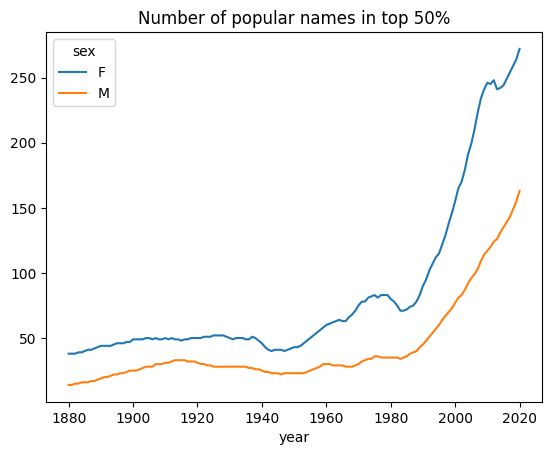

In [23]:
diversity.plot(title='Number of popular names in top 50%')

In [24]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index =last_letters, columns = ['sex', 'year'], aggfunc = sum)

In [25]:
subtable = table.reindex(columns = [1910, 1960, 2010, 2015], level = 'year')
subtable.head()

sex                 F                                      M            \
year             1910      1960      2010      2015     1910      1960   
last_letter                                                              
a            108399.0  691285.0  677176.0  661072.0    977.0    5214.0   
b                 NaN     694.0     455.0     596.0    411.0    3910.0   
c                 5.0      49.0     957.0    1259.0    482.0   15456.0   
d              6751.0    3732.0    2645.0    3256.0  22112.0  262106.0   
e            133601.0  435009.0  316921.0  327352.0  28665.0  178742.0   

sex                              
year             2010      2015  
last_letter                      
a             28888.0   29042.0  
b             39298.0   29630.0  
c             23360.0   23156.0  
d             44856.0   43813.0  
e            130325.0  128684.0

In [26]:
subtable.sum()

sex  year
F    1910     396505.0
     1960    2022001.0
     2010    1776223.0
     2015    1782611.0
M    1910     194209.0
     1960    2131990.0
     2010    1917416.0
     2015    1914078.0
dtype: float64

In [27]:
letter_prop = subtable / subtable.sum().astype(float)

<Axes: title={'center': 'Female'}, xlabel='last_letter'>

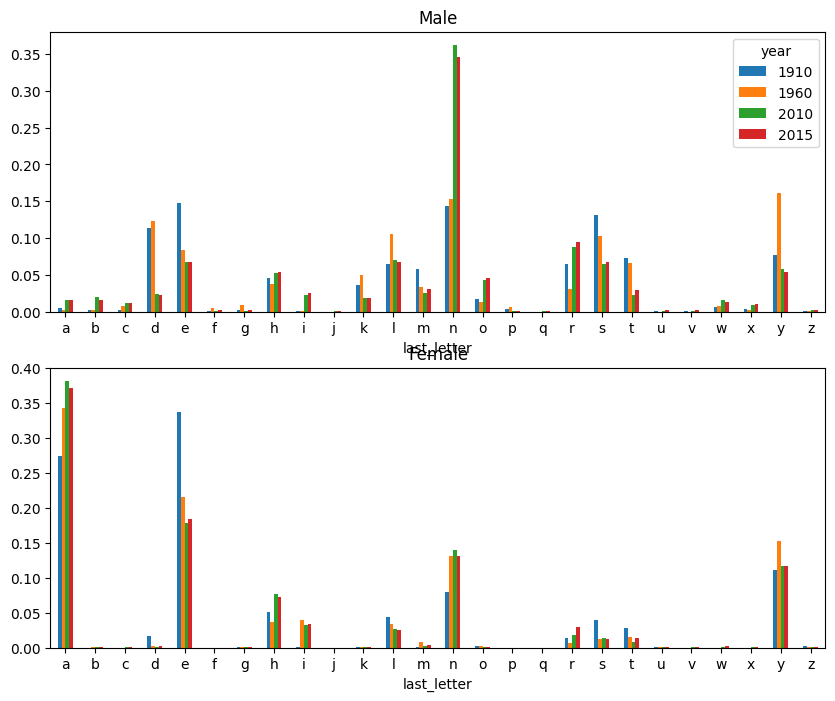

In [28]:
fig, axes = plt.subplots(2, 1, figsize = (10, 8))
letter_prop['M'].plot(kind = 'bar', rot =0, ax = axes[0], title = 'Male')
letter_prop['F'].plot(kind = 'bar', rot =0, ax = axes[1], title = 'Female', legend=False)

In [29]:
letter_prop = table / table.sum().astype(float)
dnt_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dnt_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153221,0.077459
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


<Axes: xlabel='year'>

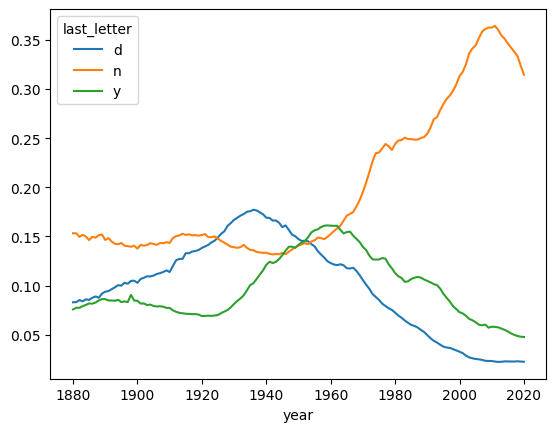

In [30]:
dnt_ts.plot()

In [31]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like


array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [32]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35038
Lesli        929
Leslie    379245
Lesly      11433
Name: births, dtype: int64

In [33]:
table = filtered.pivot_table('births', index = 'year', columns = 'sex', aggfunc = 'sum')
table = table.div(table.sum(1), axis =0)
table.tail()

sex,F,M
year,,
2016,1.0,NaN
2017,1.0,NaN
2018,1.0,NaN
2019,1.0,NaN
2020,1.0,NaN


<Axes: xlabel='year'>

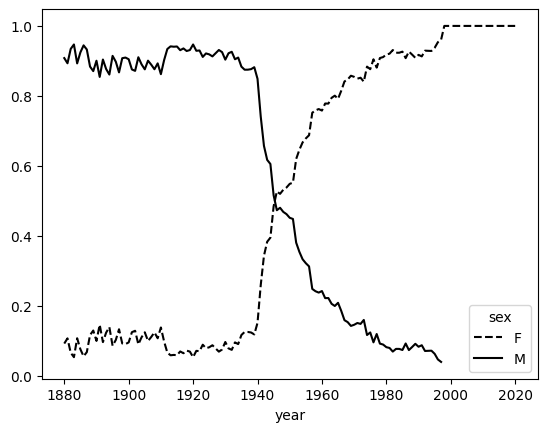

In [34]:
table.plot(style={'M': 'k-', 'F': 'k--'})